# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
      
    # Print the city count to confirm sufficient count
len(cities)


607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#create lists to store weather data
temps = []
humidity = []
cloudiness = []
windSpeed = []
country = []
dates = []
clean_cities = []
bad_cities = []
lat_list = []
lng_list = []


# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print("Beginning Data Retrieval")
print("------------------------------------------")

#define record and set counters
record_counter = 1
set_counter = 1

for city in cities:
    response = requests.get(query_url + city)
    data = response.json()
    
    if data['cod'] == 200:
        print(f"Processing Record {record_counter} of Set {set_counter} for {city}")      
        
        clean_cities.append(city)
        
        dates.append(data['dt'])
        temps.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        windSpeed.append(data['wind']['speed'])
        country.append(data['sys']['country']) 
        lat_list.append(data['coord']['lat'])
        lng_list.append(data['coord']['lon'])
        
        record_counter += 1 
    
    elif data['cod'] == '404':
        print(f"Record {record_counter} Failed: {city}")
        bad_cities.append(city)
        record_counter += 1
    else:
        print(f"Unknown Error for {city}")
        record_counter += 1
        
    if (record_counter/50) in range(15):
        set_counter += 1 
    
    time.sleep(1) 
                        

Beginning Data Retrieval
------------------------------------------
Processing Record 1 of Set 1 for kapaa
Processing Record 2 of Set 1 for ushuaia
Processing Record 3 of Set 1 for waingapu
Processing Record 4 of Set 1 for thompson
Processing Record 5 of Set 1 for nouadhibou
Processing Record 6 of Set 1 for trebukhiv
Processing Record 7 of Set 1 for coquimbo
Processing Record 8 of Set 1 for albany
Processing Record 9 of Set 1 for yellowknife
Processing Record 10 of Set 1 for klaksvik
Processing Record 11 of Set 1 for ambilobe
Processing Record 12 of Set 1 for bluff
Processing Record 13 of Set 1 for hermanus
Processing Record 14 of Set 1 for ponta do sol
Processing Record 15 of Set 1 for qui nhon
Record 16 Failed: balimo
Record 17 Failed: aflu
Processing Record 18 of Set 1 for timbiqui
Processing Record 19 of Set 1 for bredasdorp
Processing Record 20 of Set 1 for punta arenas
Processing Record 21 of Set 1 for mataura
Processing Record 22 of Set 1 for busselton
Processing Record 23 of Se

Processing Record 196 of Set 4 for clarence town
Processing Record 197 of Set 4 for arauco
Processing Record 198 of Set 4 for hamilton
Processing Record 199 of Set 4 for fastiv
Processing Record 200 of Set 5 for fortuna
Processing Record 201 of Set 5 for panaba
Processing Record 202 of Set 5 for lompoc
Processing Record 203 of Set 5 for camana
Record 204 Failed: bo
Processing Record 205 of Set 5 for whithorn
Processing Record 206 of Set 5 for pelaya
Processing Record 207 of Set 5 for richards bay
Processing Record 208 of Set 5 for dumai
Processing Record 209 of Set 5 for dekar
Processing Record 210 of Set 5 for port lincoln
Processing Record 211 of Set 5 for batagay
Processing Record 212 of Set 5 for qaanaaq
Processing Record 213 of Set 5 for sao joao de pirabas
Processing Record 214 of Set 5 for bathsheba
Processing Record 215 of Set 5 for lagos
Processing Record 216 of Set 5 for bilibino
Processing Record 217 of Set 5 for payson
Processing Record 218 of Set 5 for port hardy
Processin

Processing Record 385 of Set 8 for sao geraldo do araguaia
Processing Record 386 of Set 8 for geraldton
Processing Record 387 of Set 8 for aykhal
Processing Record 388 of Set 8 for broken hill
Processing Record 389 of Set 8 for krasnoarmeysk
Record 390 Failed: toliary
Processing Record 391 of Set 8 for mongoumba
Processing Record 392 of Set 8 for tome
Record 393 Failed: rolim de moura
Processing Record 394 of Set 8 for muros
Processing Record 395 of Set 8 for mae sai
Processing Record 396 of Set 8 for morant bay
Processing Record 397 of Set 8 for pringsewu
Record 398 Failed: tungkang
Processing Record 399 of Set 8 for kalmunai
Processing Record 400 of Set 9 for araouane
Processing Record 401 of Set 9 for palmas
Processing Record 402 of Set 9 for asekeyevo
Processing Record 403 of Set 9 for tindivanam
Processing Record 404 of Set 9 for kongoussi
Processing Record 405 of Set 9 for tahta
Processing Record 406 of Set 9 for cabedelo
Record 407 Failed: atka
Processing Record 408 of Set 9 for

Processing Record 575 of Set 12 for santa rosa
Processing Record 576 of Set 12 for teguldet
Processing Record 577 of Set 12 for tarata
Processing Record 578 of Set 12 for guerrero negro
Processing Record 579 of Set 12 for paamiut
Processing Record 580 of Set 12 for codajas
Processing Record 581 of Set 12 for gravdal
Processing Record 582 of Set 12 for abashiri
Processing Record 583 of Set 12 for dovolnoye
Processing Record 584 of Set 12 for melilla
Processing Record 585 of Set 12 for marawi
Processing Record 586 of Set 12 for miramar
Processing Record 587 of Set 12 for burnie
Processing Record 588 of Set 12 for kermanshah
Processing Record 589 of Set 12 for sao joao da barra
Processing Record 590 of Set 12 for yar-sale
Processing Record 591 of Set 12 for sharjah
Record 592 Failed: blonduos
Processing Record 593 of Set 12 for kargopol
Processing Record 594 of Set 12 for pangnirtung
Processing Record 595 of Set 12 for cobija
Processing Record 596 of Set 12 for nuuk
Processing Record 597 

In [54]:
summary_df = pd.DataFrame(
    {'Cities': clean_cities,
     'Cloudiness': cloudiness,
     'Country': country,
     'Date': dates,
     'Humidity': humidity,
     'Lat': lat_list,
     'Lng': lng_list,
     'Max Temp': temps,
     'WindSpeed' : windSpeed  
    
})

summary_df.head()

summary_df.to_csv("../output_data/summary.csv", index=True, header=True, index_label = "City_ID")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
summary_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,WindSpeed
0,kapaa,40,US,1584239847,61,22.08,-159.32,78.80,13.87
1,ushuaia,40,AR,1584239637,62,-54.80,-68.30,53.60,8.05
2,waingapu,28,ID,1584239682,72,-9.66,120.26,83.39,6.22
3,thompson,20,CA,1584239734,52,55.74,-97.86,-7.60,4.74
4,nouadhibou,0,MR,1584239608,82,20.93,-17.03,64.40,14.99


In [38]:
#Capture the dates for titles
unformatted_date = summary_df["Date"][0]
date = datetime.utcfromtimestamp(ts).strftime('%m/%y/%d')


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

### Observations
#### 1) Based on the chart below, the temperature increases are the latitude approaches zero. 
#### 2) Also, as the latitude increases, the max temperature decreases


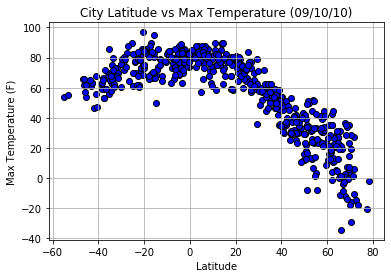

In [58]:
plt.scatter(summary_df['Lat'], summary_df['Max Temp'] , marker="o", facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../output_data/lat_vs_temp.jpg")

# Latitude vs. Humidity Plot

### Observations
#### 1) Based on the chart below, there does not appear to be any type of correlation between latitude and humidity


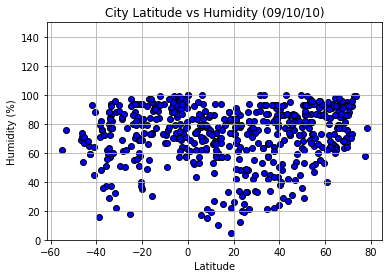

In [59]:
plt.scatter(summary_df['Lat'], summary_df['Humidity'] , marker="o", facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,150)
plt.grid()
plt.savefig("../output_data/lat_vs_humidity.jpg")

# Latitude vs. Cloudiness Plot

### Observations
#### 1) The Cloudiness % seems to be evenly spread between all latitude levels

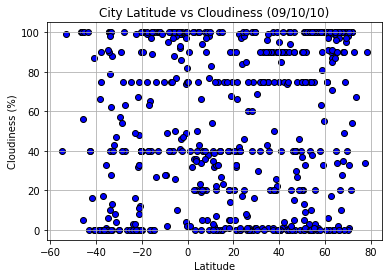

In [41]:
plt.scatter(summary_df['Lat'], summary_df['Cloudiness'] , marker="o", facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../output_data/lat_vs_cloudiness.jpg")


# Latitude vs. Wind Speed Plot

### Observations
#### 1) There look to be several outliers for wind speed
#### 2) Wind Speed appears to increase as latitude increases
#### 3) Wind Speed appears to decrease as latitude decreases

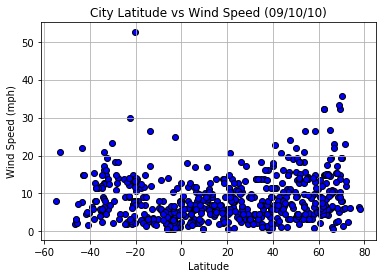

In [42]:
plt.scatter(summary_df['Lat'], summary_df['WindSpeed'] , marker="o", facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../output_data/lat_vs_windspeed.jpg")


## Linear Regression

In [43]:
# OPTIONAL: Create a function to create Linear Regression plots
def create_linreg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")
    plt.show()
    

In [44]:
# Create Northern and Southern Hemisphere DataFrames
north_df = summary_df.loc[summary_df["Lat"] >= 0,  :]
south_df = summary_df.loc[summary_df["Lat"] < 0,  :]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9101000269992137


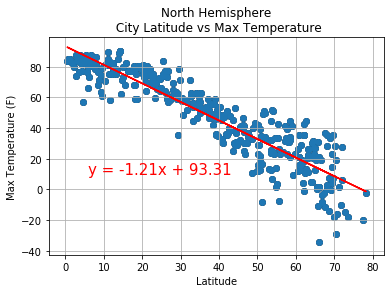

In [45]:
x = north_df['Lat']
y = north_df['Max Temp']

plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
plt.title("North Hemisphere\n City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

create_linreg(x,y)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5839622778154058


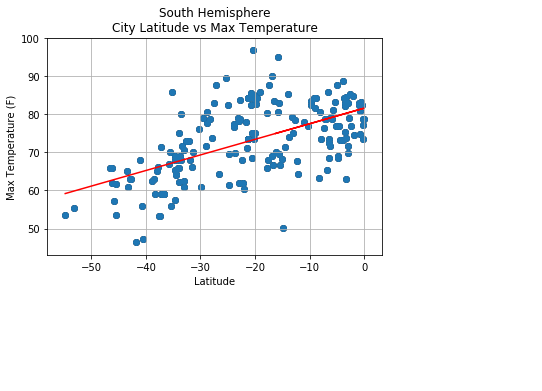

In [46]:
x = south_df['Lat']
y = south_df['Max Temp']

plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
plt.title("South Hemisphere\nCity Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

create_linreg(x,y)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2941941826944394


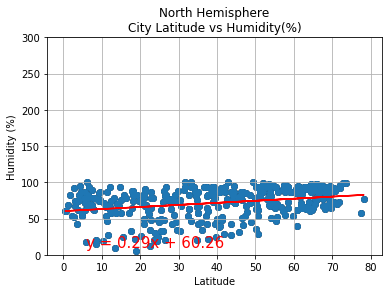

In [47]:
x = north_df['Lat']
y = north_df['Humidity']

plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
plt.title("North Hemisphere\nCity Latitude vs Humidity(%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,300)
plt.grid()

create_linreg(x,y)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3460424947138537


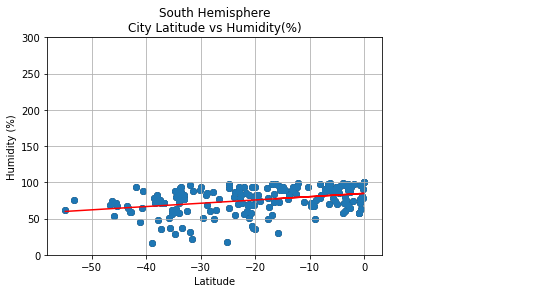

In [48]:
x = south_df['Lat']
y = south_df['Humidity']

plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
plt.title("South Hemisphere\nCity Latitude vs Humidity(%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,300)
plt.grid()

create_linreg(x,y)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2152786347225994


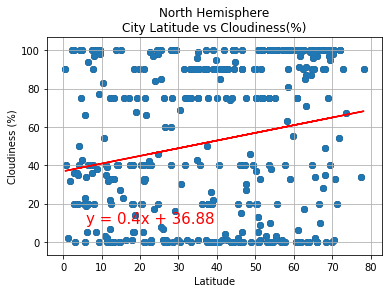

In [49]:
x = north_df['Lat']
y = north_df['Cloudiness']

plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
plt.title("North Hemisphere\nCity Latitude vs Cloudiness(%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

create_linreg(x,y)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.33384778833782613


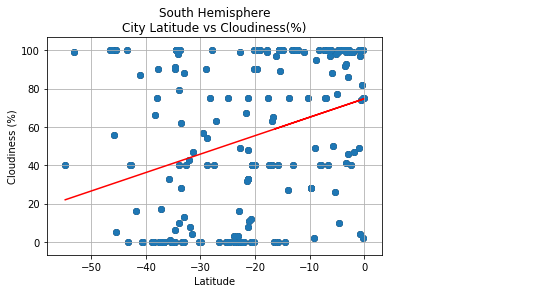

In [50]:
x = south_df['Lat']
y = south_df['Cloudiness']

plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
plt.title("South Hemisphere\nCity Latitude vs Cloudiness(%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

create_linreg(x,y)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.28721257272320927


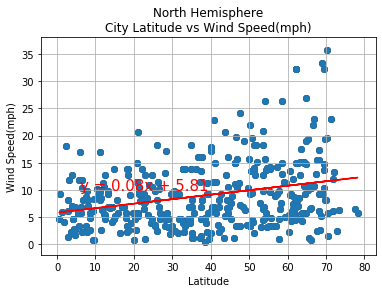

In [51]:
x = north_df['Lat']
y = north_df['WindSpeed']

plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
plt.title("North Hemisphere\nCity Latitude vs Wind Speed(mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid()

create_linreg(x,y)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2537578181742112


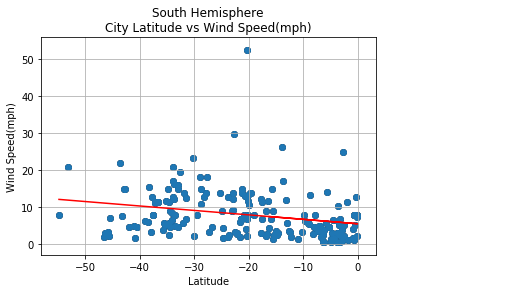

In [53]:
x = south_df['Lat']
y = south_df['WindSpeed']

plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
plt.title("South Hemisphere\nCity Latitude vs Wind Speed(mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid()

create_linreg(x,y)